In [2]:
%pylab inline
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats

import mne
from mne.decoding import GeneralizationAcrossTime

sys.path.append('/neurospin/meg/meg_tmp/Calculation_Pedro_2014/scripts/decoding')

from jr.plot import pretty_gat, pretty_decod

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Paths
from calc_decoding_cfg import (data_path, result_path)
result_path = result_path + '/individual_results/'
figures_path = result_path + '/group_results/figures/'
group_result_path = result_path + '/group_results/' 

#List of parameters
subjects = ['s01', 's02', 's03', 's04', 's05', 's06', 's07', 's08', 's09', 's10', 
         's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18','s19', 's21', 's22']

#subjects = ['s01', 's02']

conditions = [['pres_34', 'pres_34'], ['pres_35', 'pres_35'], ['pres_36', 'pres_36'], ['pres_45', 'pres_45'],
			 ['pres_46', 'pres_46'], ['pres_56', 'pres_56']]

In [4]:
#Combine results from all conditions
all_scores = []
all_diagonals = []

for c, cond in enumerate(conditions):
    for s, subject in enumerate(subjects):
        fname = result_path + subject + '_' + cond[0] + '_' + cond[1] + '_results_class.npy' 
        results = np.load(fname)
        #Convert to list 
        results = results.tolist()
        all_scores.append(results['score'])
        all_diagonals.append(results['diagonal'])
score = results['score']
diagonal = results['diagonal']
time_calc = results['times_calc']
params = results['params']
all_scores = np.array(all_scores) #shape: subjects*n_cond, training_times, testing_times
all_diagonals = np.array(all_diagonals)

In [6]:
#Average data
#Reshape 
all_scores = np.reshape(all_scores, (len(conditions), len(subjects), score.shape[0], score.shape[1])) #n_cond, n_subj, training_times, testing_times
all_diagonals = np.reshape(all_diagonals, (len(conditions), len(subjects), diagonal.shape[0]))

group_scores = np.zeros((len(conditions), all_scores.shape[2], all_scores.shape[3]))
sem_group_scores = np.zeros((len(conditions), all_scores.shape[2], all_scores.shape[3]))
group_diagonal = np.zeros((len(conditions), all_diagonals.shape[2]))
sem_group_diagonal = np.zeros((len(conditions), all_diagonals.shape[2]))


for c, cond in enumerate(conditions):
    group_scores[c, :, :] = np.mean(all_scores[c, :, :, :], 0)
    sem_group_scores[c, :, :] = stats.sem(all_scores[c, :, :, :], 0)

    group_diagonal[c, :] = np.mean(all_diagonals[c, :, :], 0)
    sem_group_diagonal[c, :] = stats.sem(all_diagonals[c, :, :], 0)

['op1comp', 'op1comp']
s01


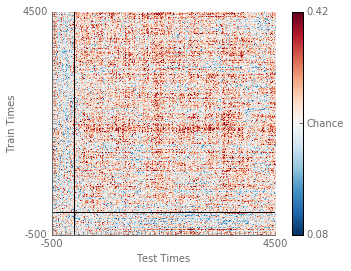

['op1comp', 'op1comp']
s02


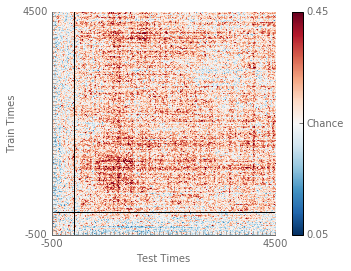

['op1comp', 'op1comp']
s03


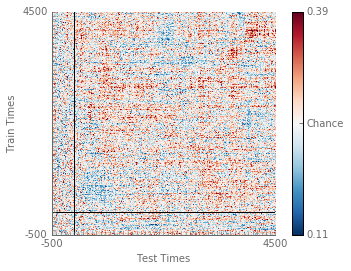

['op1comp', 'op1comp']
s04


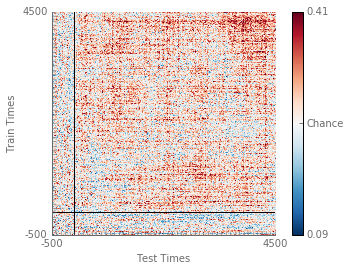

['op1comp', 'op1comp']
s05


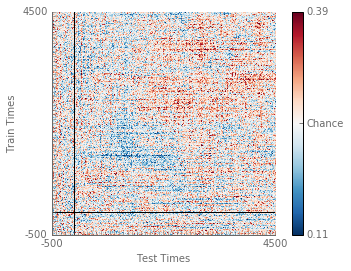

['op1comp', 'op1comp']
s06


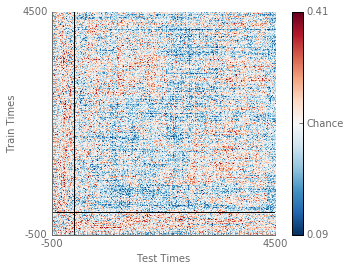

['op1comp', 'op1comp']
s07


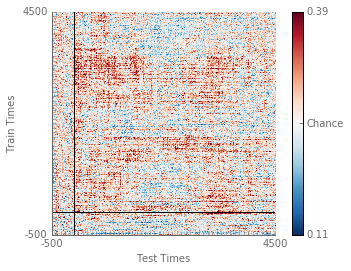

['op1comp', 'op1comp']
s08


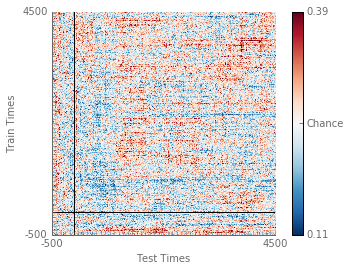

['op1comp', 'op1comp']
s09


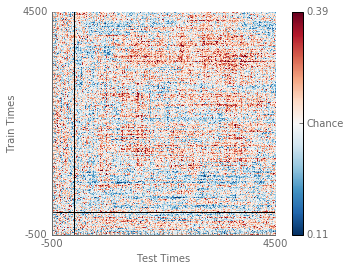

['op1comp', 'op1comp']
s10


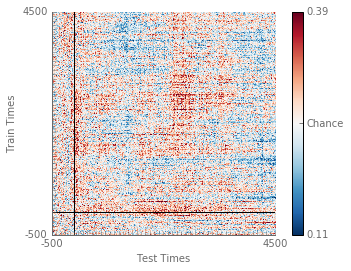

['op1comp', 'op1comp']
s11


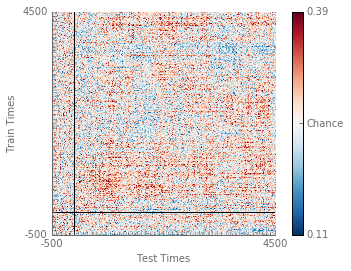

['op1comp', 'op1comp']
s12


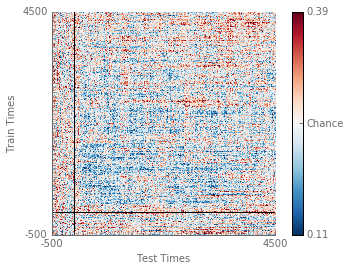

['op1comp', 'op1comp']
s13


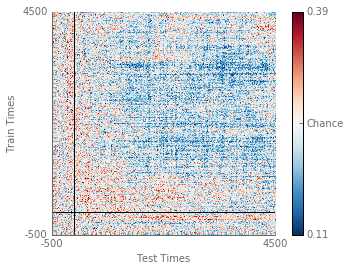

['op1comp', 'op1comp']
s14


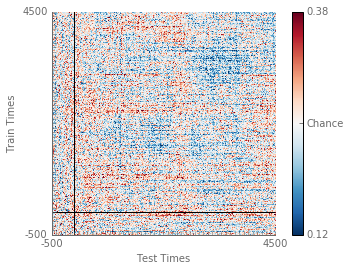

['op1comp', 'op1comp']
s15


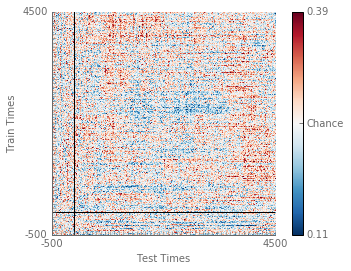

['op1comp', 'op1comp']
s16


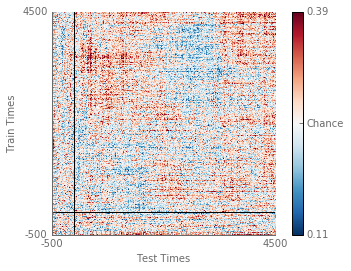

['op1comp', 'op1comp']
s17


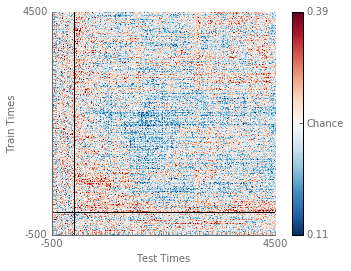

['op1comp', 'op1comp']
s18


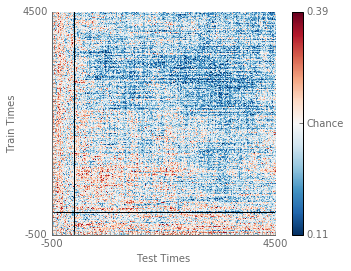

['op1comp', 'op1comp']
s19


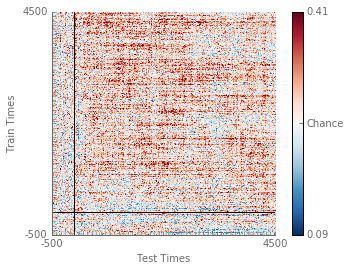

['op1comp', 'op1comp']
s21


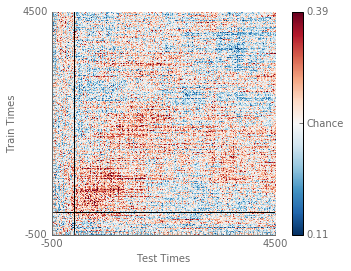

['op1comp', 'op1comp']
s22


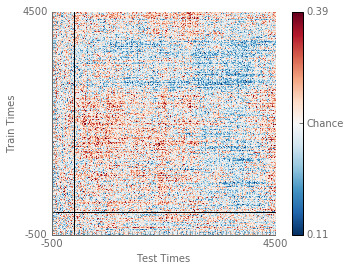

In [16]:
# Plot individual data
for c, cond in enumerate(conditions):
    for s, subject in enumerate(subjects):
        print(cond)
        print(subject)
        pretty_gat(all_scores[c, s, :, :], times=time_calc, chance=.25)

        plt.show()

In [ ]:
group_scores.shape()

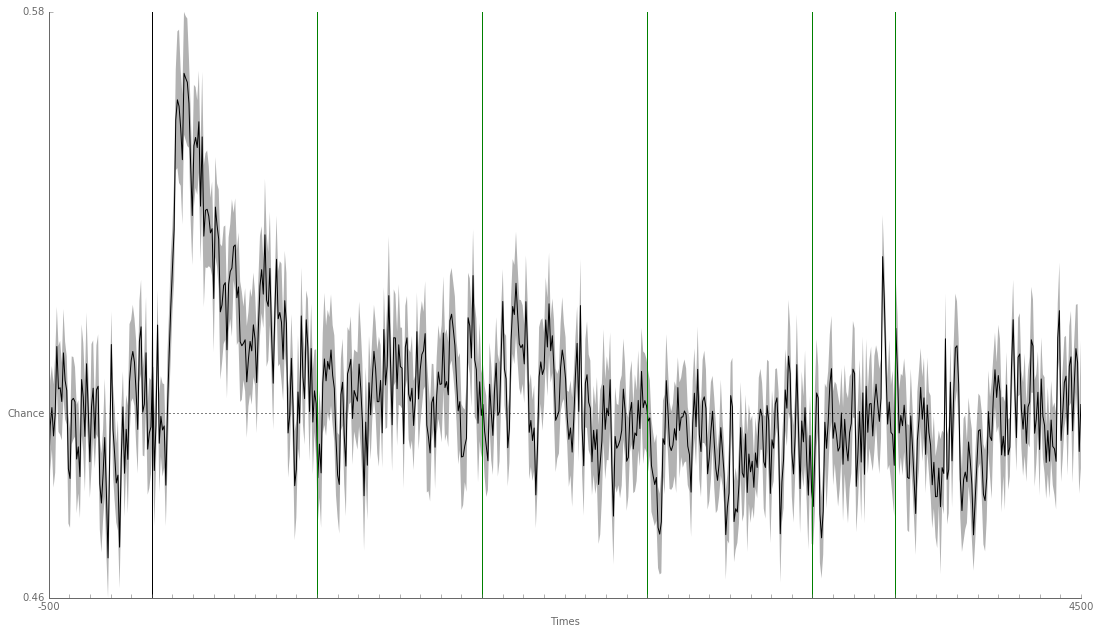

In [9]:
pretty_decod(all_diagonals[c, :, :], times=time_calc, chance=.5, alpha=.05,  width=3)
plt.axvline(.8, color = 'g') #mark stimulus onset
plt.axvline(1.6, color = 'g') #mark stimulus onset
plt.axvline(2.4, color = 'g') #mark stimulus onset
plt.axvline(3.2, color = 'g') #mark stimulus onset
plt.axvline(3.6, color = 'g') #mark stimulus onset

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

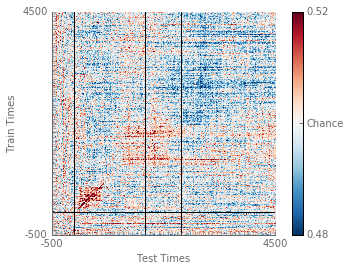

In [7]:
pretty_gat(group_scores[c, :, :], times=time_calc, chance=.5)
plt.axvline(1.6, color = 'k') #mark stimulus onset
plt.axvline(2.4, color = 'k') #mark stimulus onset

In [ ]:
from matplotlib import interactive
interactive(True)